## ITER Poloidal Field coil optimization example

In [1]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using Plots; gr();

  Activating new project at `~/.julia/dev/FUSE/examples`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1423


### Initialization of the ITER, dd,ini,act

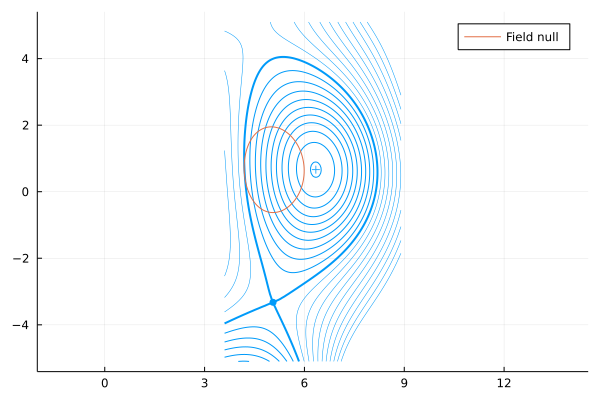

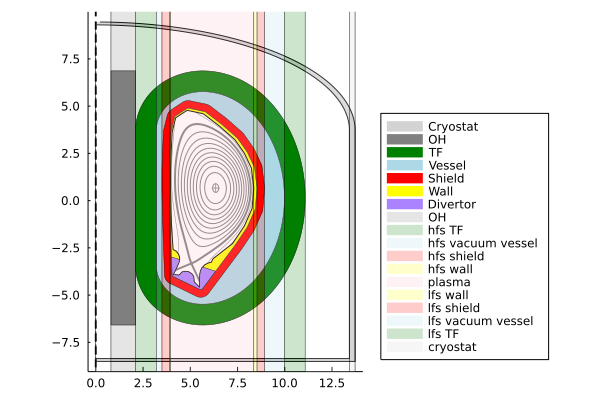

13×8 DataFrame
 Row │ group   name           ΔR       R_start  R_end    material   area      volume    
     │ String  String         Float64  Float64  Float64  String     Float64   Float64   
─────┼──────────────────────────────────────────────────────────────────────────────────
   1 │ in                        0.8      0.0      0.8              10.7597     27.0421
   2 │ in      OH                1.3      0.8      2.1   Nb3Sn      17.4845    159.295
   3 │ hfs     TF                1.1      2.1      3.2   Nb3Sn      36.7172    484.472
   4 │ hfs     vacuum vessel     0.3      3.2      3.5   Water      20.8103    934.786
   5 │ hfs     shield            0.4      3.5      3.9   Tungsten    9.81998   356.626
   6 │ hfs     wall              0.06     3.9      3.96  Steel       4.17208   160.693
   7 │ lhfs    plasma            4.4      3.96     8.36  DT_plasma  28.8365   1062.79
   8 │ lfs     wall              0.17     8.36     8.53  Steel       4.17208   160.693
   9 │ lfs     shield 

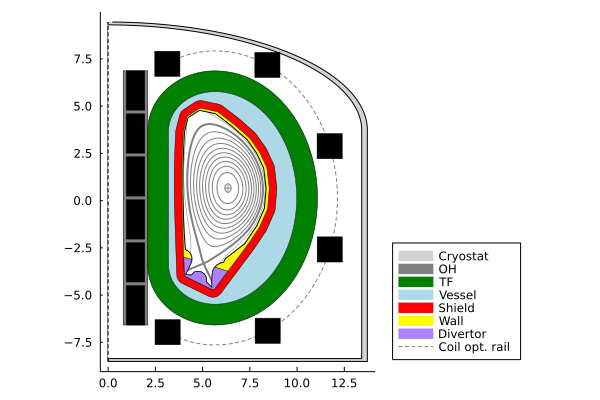

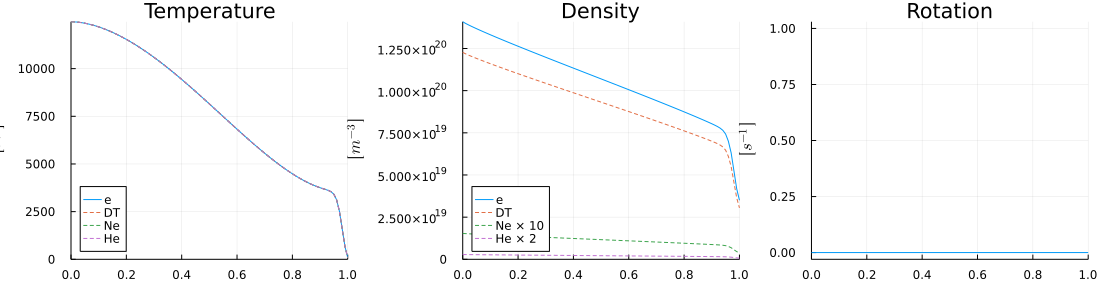

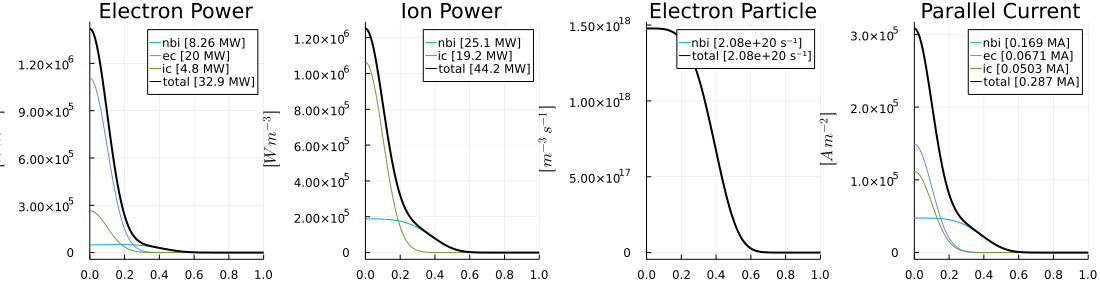

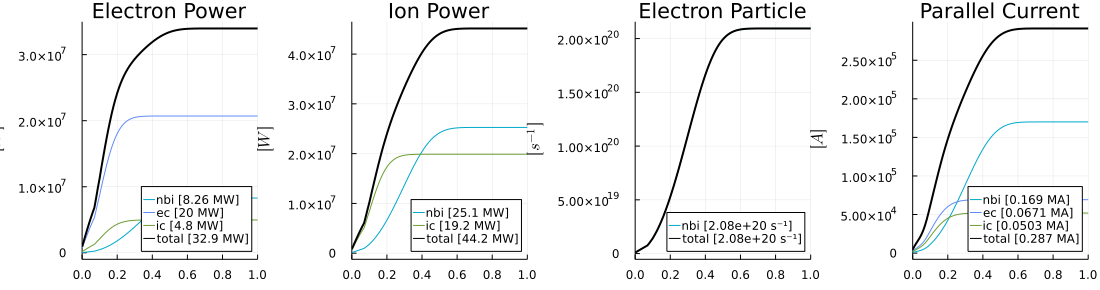

┌ Warning: equilibrium.ids_properties was skipped in IMAS data dictionary
└ @ IMASDD /Users/timslendebroek/.julia/dev/IMASDD/src/data.jl:1058
┌ Warning: Keyword argument letter not supported with Plots.GRBackend().  Choose from: Set([:top_margin, :group, :inset_subplots, :background_color, :ytickfontsize, :yforeground_color_text, :yguidefontcolor, :tickfontfamily, :show_empty_bins, :seriesalpha, :seriescolor, :ztick_direction, :xgrid, :ygridalpha, :zlims, :xtick_direction, :colorbar, :legend_font_family, :zflip, :ticks, :linealpha, :overwrite_figure, :arrow, :xguidefonthalign, :normalize, :linestyle, :xtickfontvalign, :xflip, :zgrid, :fillcolor, :ygrid, :bar_width, :colorbar_scale, :background_color_inside, :zguidefonthalign, :bins, :zguide, :zforeground_color_text, :legend_font_valign, :yscale, :legend_font_color, :weights, :xgridalpha, :ygridstyle, :clims, :xtickfontcolor, :fill_z, :xguide, :markershape, :background_color_subplot, :ztickfontfamily, :fillalpha, :markerstrokewidth, :ti

In [2]:
dd, ini, act = FUSE.init(:ITER, init_from=:ods, do_plot=true);

### Run the SteadyStateCurrent actor in order to estimate how much ohmic current will be required during flattop
[SteadyStateCurrent actor](https://fuse.help/actors.html#SteadyStateCurrent)


In [17]:
FUSE.ActorSteadyStateCurrent(dd,act);

### Estimate how much flux is required during start-up
[FluxSwing actor](https://fuse.help/actors.html#FluxSwing)



In [28]:
FUSE.ActorFluxSwing(dd,act; operate_at_j_crit=false)#,j_tolerance=1.0)
# critial_j shoudl be the same as max_j
dd.build.oh
# Estimated flattop durration at maximum oh current operation suggests that ITER can run for 3500 seconds! 

oh
├─ critical_b_field ➡ 8.5549
├─ critical_j ➡ 2.79407e+07
├─ flattop_duration ➡ 1000
├─ flattop_estimate ➡ 1000
├─ max_b_field ➡ 12.6561
├─ max_j ➡ 7.74725e+06
└─ technology
   ├─ JxB_strain ➡ -0.05
   ├─ fraction_stainless ➡ 0.46
   ├─ fraction_void ➡ 0.1
   ├─ material ➡ "Nb3Sn"
   ├─ ratio_SC_to_copper ➡ 1
   ├─ temperature ➡ 4.2
   └─ thermal_strain ➡ -0.64


### Plot FUSE build on top of ARC drawing


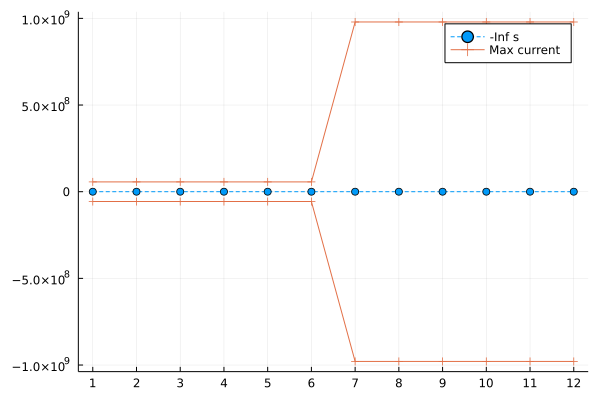

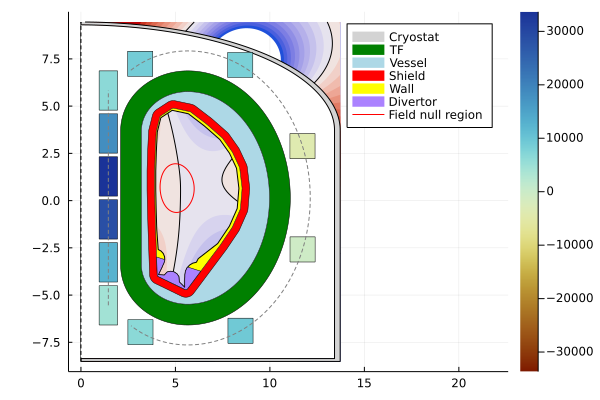

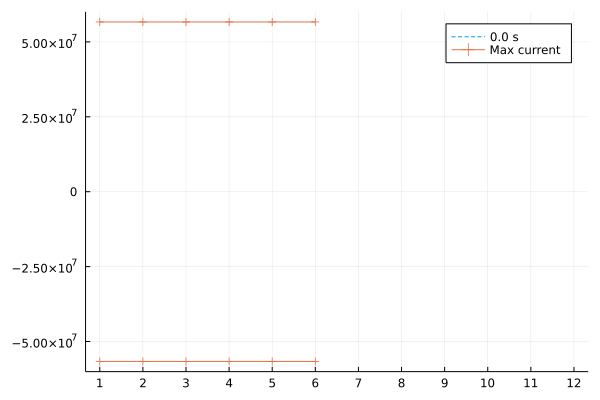

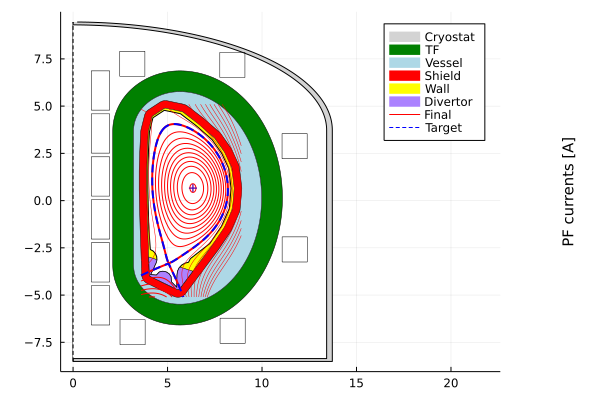

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range


dd
├─ balance_of_plant
│  ├─ Q_plant ➡ Function
│  ├─ power_electric_net ➡ Function
│  ├─ power_electric_plant_operation
│  │  └─ total_power ➡ Function
│  └─ thermal_cycle
│     └─ power_electric_generated ➡ Function
├─ build
│  ├─ flux_swing_estimates
│  │  ├─ flattop ➡ 13.6569
│  │  ├─ pf ➡ -31.1731
│  │  └─ rampup ➡ 195.908
│  ├─ layer
│  │  ├─ 1
│  │  │  ├─ area ➡ Function
│  │  │  ├─ end_radius ➡ Function
│  │  │  ├─ fs ➡ 2
│  │  │  ├─ identifier ➡ 7653906519645546835
│  │  │  ├─ material ➡ "Vacuum"
│  │  │  ├─ name ➡ "gap OH"
│  │  │  ├─ outline
│  │  │  │  ├─ r ➡ 5-element Vector{Float64}
│  │  │  │  └─ z ➡ 5-element Vector{Float64}
│  │  │  ├─ shape ➡ Function
│  │  │  ├─ shape_parameters ➡ Function
│  │  │  ├─ start_radius ➡ Function
│  │  │  ├─ thickness ➡ 0.8
│  │  │  ├─ type ➡ 0
│  │  │  └─ volume ➡ Function
│  │  ├─ 2
│  │  │  ├─ area ➡ Function
│  │  │  ├─ end_radius ➡ Function
│  │  │  ├─ fs ➡ 2
│  │  │  ├─ identifier ➡ 7141519176361583869
│  │  │  ├─ material ➡ "Nb3Sn"

In [ ]:
FUSE.init_pf_active(dd,ini,act)
#plot(dd.pf_active)
#act.ActorPFcoilsOpt[:optimization_scheme]
FUSE.ActorPFcoilsOpt(dd,act;optimization_scheme=:currents,do_plot=true);